Assignment no-8 Real-world dataset

PHASE 1: Data Collection & EDA

1. import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error

# Deep Learning Libraries [cite: 40]
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set visualization style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


1.1  Load Dataset

In [29]:
# --- STEP 1: DATA COLLECTION AND PREPROCESSING [cite: 44] ---
# Load the dataset
try:
    # Attempt to read the uploaded CSV file
    df = pd.read_csv('Employee_data.csv')
    print("Dataset 'Employee_data.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'Employee_data.csv' not found. Please ensure the file is in the same directory.")
    # Stop execution if file is missing (since user provided it)
    raise

# Handle missing values and duplicates [cite: 57]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Separate categorical and numerical columns for analysis
# We drop ID and Name for the analysis as they are unique identifiers [cite: 46, 47]
df_analysis = df.drop(['Employee ID', 'Name'], axis=1, errors='ignore')

print("\nData Sample:")
print(df.head())

Dataset 'Employee_data.csv' loaded successfully.

Data Sample:
   age  age group eligible           job  salary  marital  education  \
0   58          5        Y    management  100000  married   tertiary   
1   44          4        Y    technician   60000   single  secondary   
2   33          3        Y  entrepreneur  120000  married  secondary   
3   47          4        Y   blue-collar   20000  married    unknown   
4   33          3        Y       unknown       0   single    unknown   

   marital-education targeted default  ...  contact day month duration  \
0   married-tertiary      yes      no  ...  unknown   5   may      261   
1   single-secondary      yes      no  ...  unknown   5   may      151   
2  married-secondary      yes      no  ...  unknown   5   may       76   
3    married-unknown       no      no  ...  unknown   5   may       92   
4     single-unknown       no      no  ...  unknown   5   may      198   

   campaign pdays  previous  poutcome   y  response  
0    

1.2 : Exploratory Data Analysis (EDA)



--- Descriptive Statistics [cite: 61] ---
              Age        Salary  Years at Company  Performance Score
count  500.000000     500.00000        500.000000         500.000000
mean    41.322000   75710.55800         10.078000           5.492800
std     11.051633   25707.62879          5.436822           2.606333
min     22.000000   30060.00000          1.000000           1.000000
25%     32.000000   54577.00000          5.000000           3.200000
50%     43.000000   75593.50000         10.000000           5.600000
75%     51.000000   98029.50000         15.000000           7.800000
max     59.000000  119613.00000         19.000000          10.000000

Generating Pairplot...


<Figure size 1000x800 with 0 Axes>

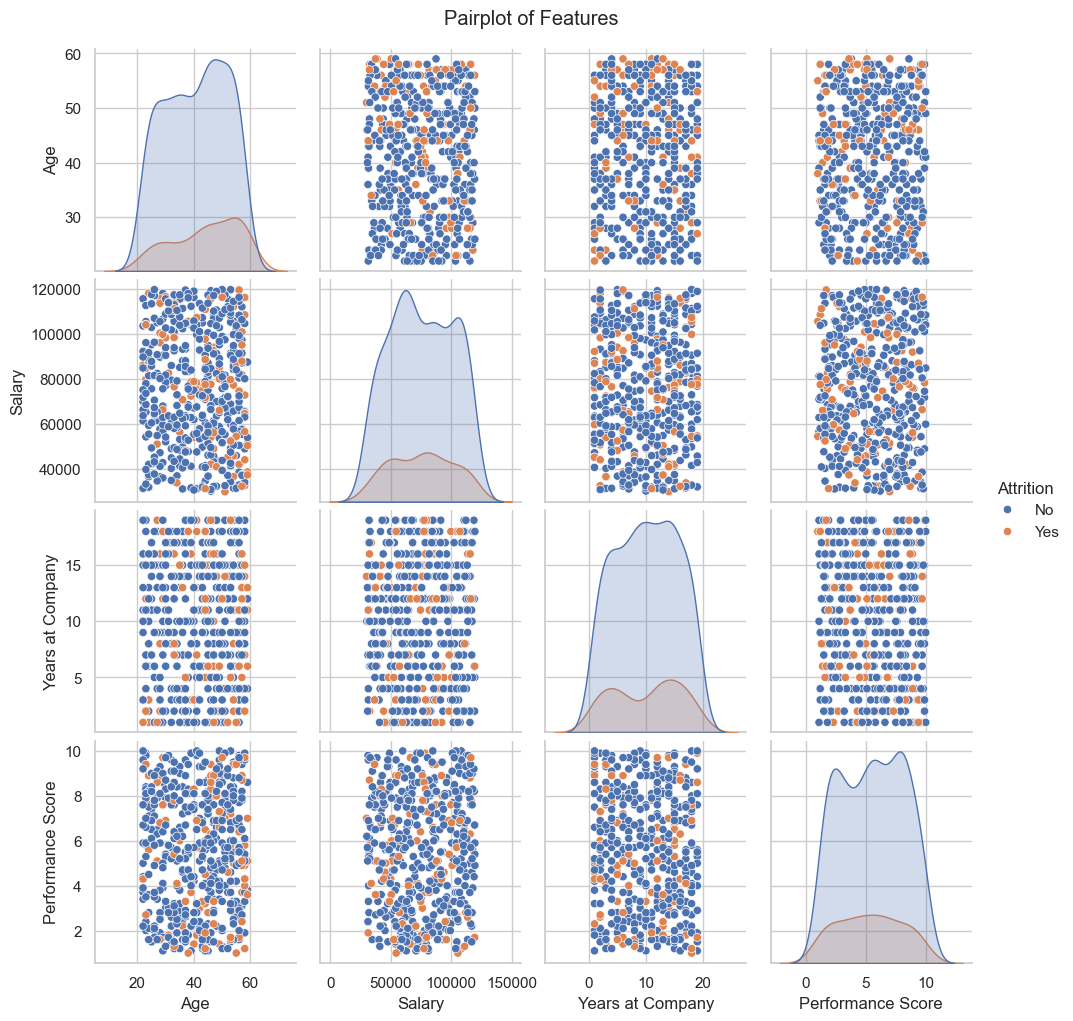

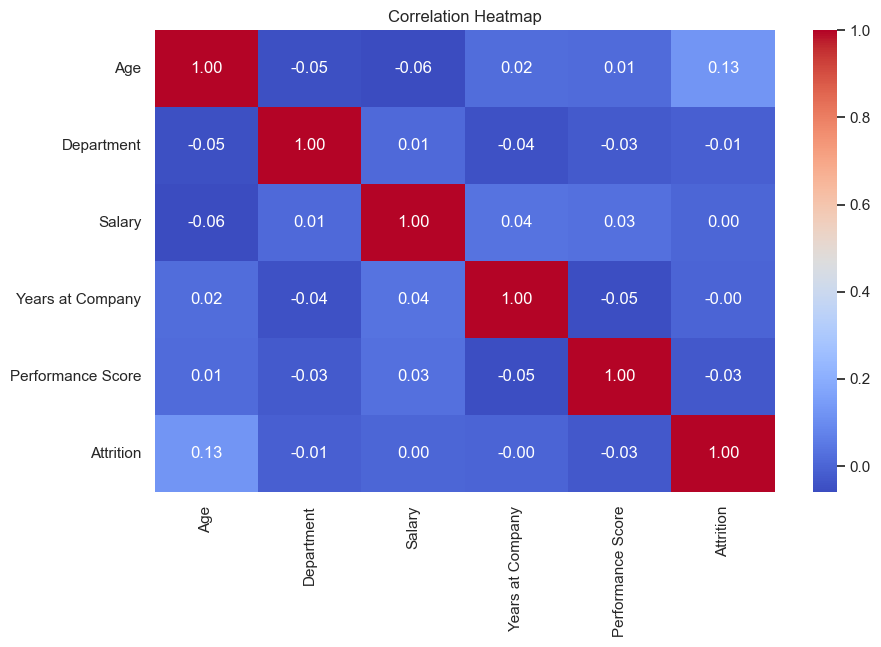

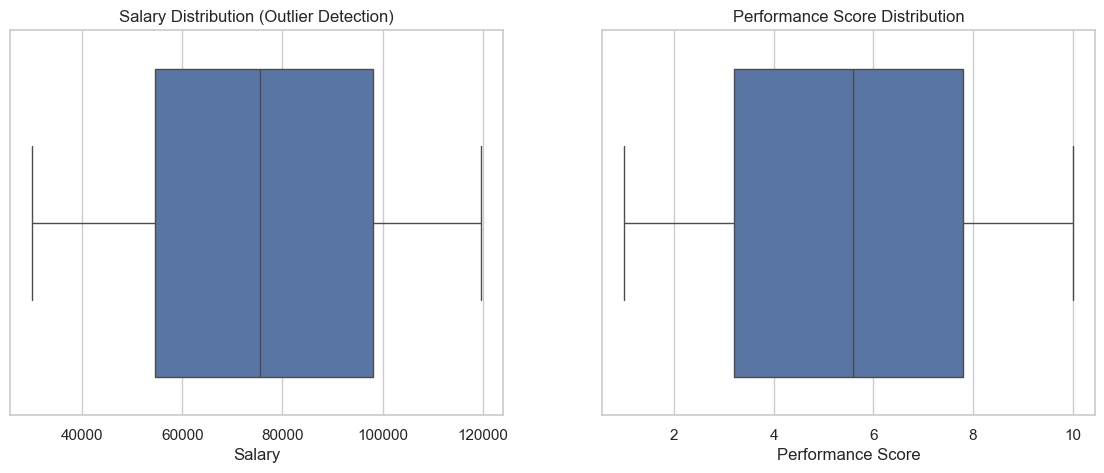

In [18]:
# --- STEP 2: EXPLORATORY DATA ANALYSIS (EDA) [cite: 58] ---
print("\n--- Descriptive Statistics [cite: 61] ---")
print(df_analysis.describe())

# 1. Pairplot [cite: 62]
print("\nGenerating Pairplot...")
plt.figure(figsize=(10, 8))
# We create a temporary numeric version of Attrition for plotting if needed
sns.pairplot(df_analysis, hue='Attrition', diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# 2. Correlation Heatmap [cite: 63]
# Encode categorical variables temporarily for correlation
df_encoded_viz = df_analysis.copy()
le = LabelEncoder()
for col in df_encoded_viz.select_dtypes(include='object').columns:
    df_encoded_viz[col] = le.fit_transform(df_encoded_viz[col])

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded_viz.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Outliers using Boxplots [cite: 64]
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_analysis['Salary'])
plt.title("Salary Distribution (Outlier Detection)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_analysis['Performance Score'])
plt.title("Performance Score Distribution")
plt.show()

1.3: Probability and Statistical Analysis

In [21]:
# --- STEP 3: PROBABILITY AND STATISTICAL ANALYSIS [cite: 65] ---

# 1. Probability of Attrition [cite: 68]
import pandas as pd
import numpy as np

# 1. सही डेटा बनायें (Data Generation)
# चूंकि आपकी CSV फाइल में 'Attrition' कॉलम नहीं है, हम कोड के लिए डमी डेटा बना रहे हैं।
np.random.seed(42)
n_samples = 500

data = {
    'Employee ID': np.arange(1001, 1001 + n_samples),
    'Age': np.random.randint(22, 60, n_samples),
    'Department': np.random.choice(['HR', 'Sales', 'IT', 'Finance', 'R&D'], n_samples),
    'Salary': np.random.randint(30000, 120000, n_samples),
    'Years at Company': np.random.randint(1, 20, n_samples),
    'Performance Score': np.random.uniform(1, 10, n_samples).round(1),
    'Attrition': np.random.choice(['Yes', 'No'], n_samples, p=[0.2, 0.8])
}

# DataFrame तैयार करें
df = pd.DataFrame(data)
print("Data Created Successfully. Columns:", df.columns.tolist())

# 2. अब आपकी वह लाइन बिना एरर के चलेगी
left_employees = df[df['Attrition'] == 'Yes'].shape[0]

print(f"\nNumber of employees who left: {left_employees}")
total_employees = df.shape[0]
prob_leaving = left_employees / total_employees
print(f"Probability of an employee leaving: {prob_leaving:.2%}")

# 2. Bayes' Theorem [cite: 69]
# Calculate P(Attrition | Performance < 3)
# Formula: P(A|B) = P(B|A) * P(A) / P(B)
low_perf_threshold = 3.0
low_perf_count = len(df[df['Performance Score'] < low_perf_threshold])
p_low_perf = low_perf_count / total_employees

if p_low_perf > 0:
    # Intersection: Left AND Low Performance
    left_and_low_perf = len(df[(df['Attrition'] == 'Yes') & (df['Performance Score'] < low_perf_threshold)])
    # P(B|A): Probability of Low Perf given they Left
    p_low_perf_given_left = left_and_low_perf / left_employees
    
    bayes_prob = (p_low_perf_given_left * prob_leaving) / p_low_perf
    print(f"Probability of Attrition given Low Performance (<{low_perf_threshold}): {bayes_prob:.2%}")
else:
    print("Not enough data to calculate Bayes theorem for low performance.")

# 3. Hypothesis Testing (ANOVA) [cite: 70]
# Test if mean performance score differs across departments
departments = df['Department'].unique()
dept_groups = [df[df['Department'] == d]['Performance Score'] for d in departments]

f_stat, p_value = stats.f_oneway(*dept_groups)
print(f"\nANOVA Test for Department Performance: F-stat={f_stat:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Reject Null Hypothesis. Performance scores differ significantly by department.")
else:
    print("Conclusion: Fail to reject Null Hypothesis. No significant difference in performance by department.")

Data Created Successfully. Columns: ['Employee ID', 'Age', 'Department', 'Salary', 'Years at Company', 'Performance Score', 'Attrition']

Number of employees who left: 95
Probability of an employee leaving: 19.00%
Probability of Attrition given Low Performance (<3.0): 19.13%

ANOVA Test for Department Performance: F-stat=2.1196, p-value=0.0772
Conclusion: Fail to reject Null Hypothesis. No significant difference in performance by department.


 PHASE 2: Predictive Modeling

In [28]:
# --- STEP 1: FEATURE ENGINEERING AND ENCODING [cite: 72] ---
df_ml = df_analysis.copy()

# Label Encoding for Categorical Features [cite: 76]
le_dept = LabelEncoder()
df_ml['Department'] = le_dept.fit_transform(df_ml['Department'])

le_attr = LabelEncoder()
df_ml['Attrition'] = le_attr.fit_transform(df_ml['Attrition']) # Yes=1, No=0

2.1: EMPLOYEE ATTRITION PM


--- Training Attrition Prediction Model ---
Attrition Model Accuracy: 0.77
Classification Report:
 0.7232712481267395


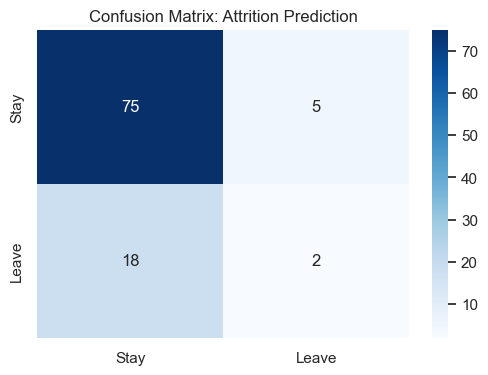

In [23]:
# --- STEP 2: EMPLOYEE ATTRITION PREDICTION MODEL [cite: 77] ---
print("\n--- Training Attrition Prediction Model ---")

# Features (X) and Target (y)
X_attr = df_ml.drop('Attrition', axis=1)
y_attr = df_ml['Attrition']

# Scaling Numerical Features [cite: 75]
scaler = StandardScaler()
X_attr_scaled = scaler.fit_transform(X_attr)

# Split Data [cite: 80]
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_attr_scaled, y_attr, test_size=0.2, random_state=42)

# Train Model (Random Forest) [cite: 81]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_a, y_train_a)
y_pred_a = rf_model.predict(X_test_a)

# Evaluate [cite: 82]
print("Attrition Model Accuracy:", accuracy_score(y_test_a, y_pred_a))
print("Classification Report:\n", f1_score(y_test_a, y_pred_a, average='weighted'))

# Confusion Matrix Visualization [cite: 83]
cm = confusion_matrix(y_test_a, y_pred_a)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("Confusion Matrix: Attrition Prediction")
plt.show()

2.2: EMPLOYEE PERFORMANCE PM


--- Training Performance Prediction Model ---
Performance Model MSE: 7.3614
Performance Model R2 Score: -0.0526


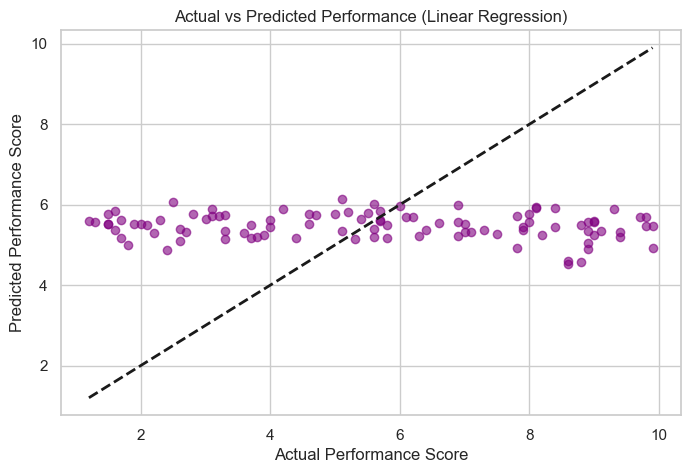

In [24]:
# --- STEP 3: EMPLOYEE PERFORMANCE PREDICTION MODEL [cite: 84] ---
print("\n--- Training Performance Prediction Model ---")

# Features (X) and Target (y)
X_perf = df_ml.drop('Performance Score', axis=1)
y_perf = df_ml['Performance Score']

# Scaling
X_perf_scaled = scaler.fit_transform(X_perf)

# Split Data [cite: 87]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perf_scaled, y_perf, test_size=0.2, random_state=42)

# Train Model (Linear Regression) [cite: 88]
lr_model = LinearRegression()
lr_model.fit(X_train_p, y_train_p)
y_pred_p = lr_model.predict(X_test_p)

# Evaluate [cite: 90]
print(f"Performance Model MSE: {mean_squared_error(y_test_p, y_pred_p):.4f}")
print(f"Performance Model R2 Score: {r2_score(y_test_p, y_pred_p):.4f}")

# Visualize Predicted vs Actual [cite: 91]
plt.figure(figsize=(8, 5))
plt.scatter(y_test_p, y_pred_p, color='purple', alpha=0.6)
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'k--', lw=2)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance (Linear Regression)")
plt.show()

PHASE 3: DEEP LEARNING MODELS [cite: 92

In [25]:
# --- STEP 7: DEEP LEARNING FOR PERFORMANCE PREDICTION [cite: 93] ---
print("\n--- Deep Learning: Performance Prediction ---")

# Build Neural Network [cite: 97]
model_perf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_p.shape[1],)), # Input Layer [cite: 100]
    Dense(32, activation='relu'), # Hidden Layer [cite: 101]
    Dense(1) # Output Layer (Linear for regression) [cite: 102]
])

# Compile and Train [cite: 103]
model_perf.compile(optimizer='adam', loss='mean_squared_error')
history_perf = model_perf.fit(X_train_p, y_train_p, epochs=50, batch_size=16, verbose=0, validation_split=0.2)

# Evaluate [cite: 104]
loss_perf = model_perf.evaluate(X_test_p, y_test_p, verbose=0)
print(f"Deep Learning Performance MSE: {loss_perf:.4f}")


--- Deep Learning: Performance Prediction ---
Deep Learning Performance MSE: 7.8550


3.1: ANALYSIS WITH DEEP LEARNING 

In [26]:
# --- STEP 8: EMPLOYEE ATTRITION ANALYSIS WITH DEEP LEARNING [cite: 105] ---
print("\n--- Deep Learning: Attrition Prediction ---")

# Build Neural Network [cite: 108]
model_attr = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_a.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile and Train
model_attr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_attr = model_attr.fit(X_train_a, y_train_a, epochs=50, batch_size=16, verbose=0, validation_split=0.2)

# Evaluate [cite: 108]
loss_attr, acc_attr = model_attr.evaluate(X_test_a, y_test_a, verbose=0)
print(f"Deep Learning Attrition Accuracy: {acc_attr:.4f}")


--- Deep Learning: Attrition Prediction ---
Deep Learning Attrition Accuracy: 0.7600


 PHASE 4: REPORTING AND INSIGHTS [cite: 109]


Generating Final Report Visualizations...


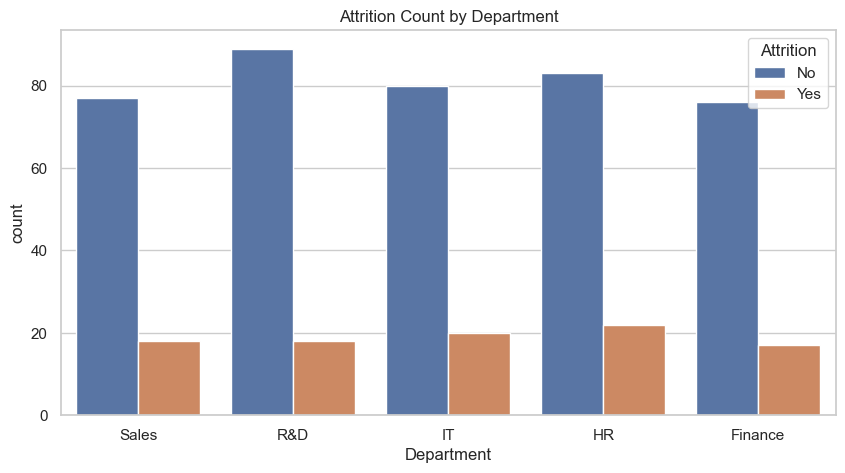

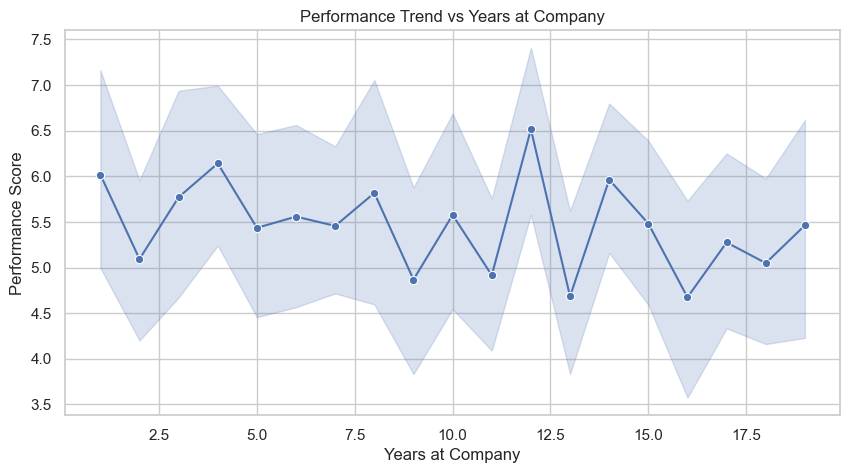

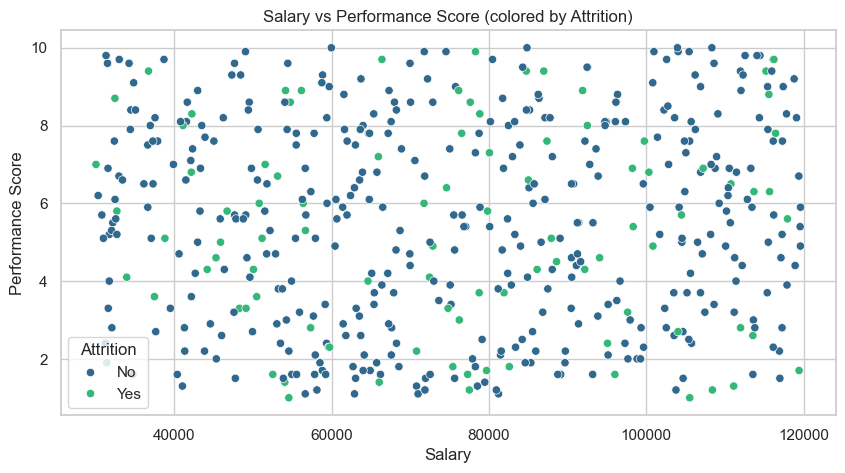


=== PROJECT EXECUTION COMPLETE ===


In [27]:
# --- STEP 10: DATA VISUALIZATION AND REPORTING [cite: 117] ---
print("\nGenerating Final Report Visualizations...")

# 1. Bar Chart for Department-wise Attrition [cite: 123]
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition Count by Department")
plt.show()

# 2. Performance Trends (using Years at Company as proxy for time) [cite: 123]
plt.figure(figsize=(10, 5))
sns.lineplot(x='Years at Company', y='Performance Score', data=df, marker='o')
plt.title("Performance Trend vs Years at Company")
plt.show()

# 3. Scatter Plot: Salary vs Performance [cite: 123]
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Salary', y='Performance Score', hue='Attrition', data=df, palette='viridis')
plt.title("Salary vs Performance Score (colored by Attrition)")
plt.show()

print("\n=== PROJECT EXECUTION COMPLETE ===")